In [94]:
from keras.models import Sequential 
from keras.layers import Dense 
import matplotlib.pyplot as plt

from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn import metrics
import textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

import pandas as pd
import seaborn as sns

In [95]:
test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')
valid = pd.read_csv('Valid.csv')

In [96]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [97]:
test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [98]:
valid.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


<AxesSubplot:xlabel='label', ylabel='count'>

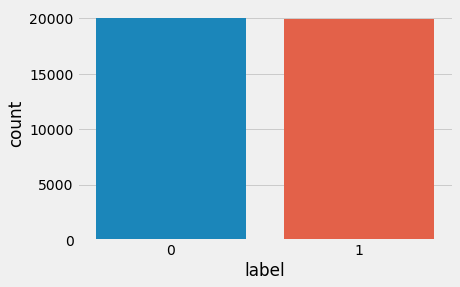

In [99]:
plt.style.use('fivethirtyeight')
sns.countplot(data=train,x='label')

<AxesSubplot:xlabel='label', ylabel='count'>

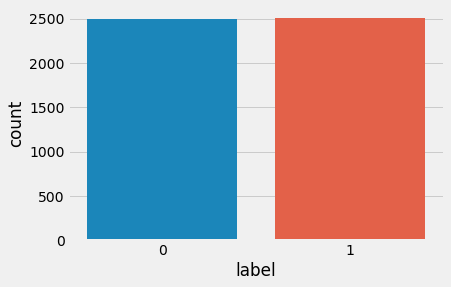

In [100]:
sns.countplot(data=test,x='label')

<AxesSubplot:xlabel='label', ylabel='count'>

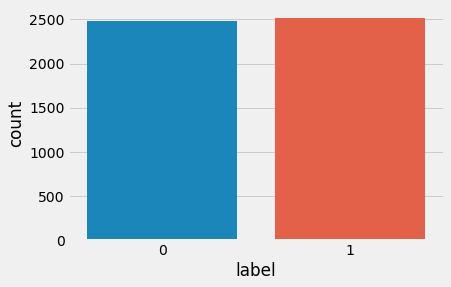

In [101]:
sns.countplot(data=valid,x='label')

In [102]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
def transformations(dataframe):
    # upper to lower character
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    #punctuations
    dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
    #numbers
    dataframe['text'] = dataframe['text'].str.replace('\d','')
    # 
    sw = stopwords.words('english')
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    #rare characters deleting
    sil = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-1000:]
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))
    
    #lemmi
    from textblob import Word
    #nltk.download('wordnet')
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
    return dataframe

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nezla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nezla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [103]:
train = transformations(train)
train.head()

,text,label
0,grew b watching loving thunderbird mate school...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change g...,1


In [104]:
test = transformations(test)
test.head()

,text,label
0,always wrote series complete stinkfest jim bel...,0
1,st watched dirsteve purcell typical mary kate ...,0
2,movie poorly written directed fell asleep minu...,0
3,interesting thing miryang secret sunshine acto...,1
4,first read berlin meer didnt expect much thoug...,0


In [105]:
valid = transformations(valid)
valid.head()

,text,label
0,year since sharon stone awarded viewer legcros...,0
1,someone needed make car payment truly awful ma...,0
2,guideline state comment must contain minimum f...,0
3,movie muddled mishmash clichés recent cinema p...,0
4,stan laurel became smaller half alltime greate...,0


In [106]:
train_x = train['text']
valid_x = valid["text"]
train_y = train["label"]
valid_y = valid["label"]

In [107]:
vectorizer = CountVectorizer()

In [108]:
vectorizer.fit(train_x)

CountVectorizer()

In [109]:
x_train_count = vectorizer.transform(train_x)
x_valid_count = vectorizer.transform(valid_x)
x_test_count  = vectorizer.transform(test["text"])

In [110]:
import tensorflow as tf
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Dense(50,input_dim=x_train_count.shape[1], kernel_initializer="uniform", activation="relu"))
#model.add(Dense(6, kernel_initializer="uniform", activation="relu")) 
model.add(tf.keras.layers.Dense(1, kernel_initializer="uniform", activation="sigmoid")) 
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Fit the model
history = model.fit(x_train_count, train_y.values.reshape(-1,1), batch_size=128,epochs=2)

Epoch 1/2
313/313 [==============================] - 16s 49ms/step - loss: 0.4588 - accuracy: 0.8106
Epoch 2/2
313/313 [==============================] - 15s 48ms/step - loss: 0.1458 - accuracy: 0.95171s - loss: 0.1


In [111]:
#loss, acc = model.evaluate(x_test_count, test["label"], verbose=0)
#print('Test Accuracy: %f' % (acc*100))

In [112]:
comments = pd.Series(test["text"])
comments = vectorizer.transform(comments)

In [124]:
y_pred = model.predict_classes(comments)
nn_cm = metrics.confusion_matrix(test["label"],y_pred)
print(nn_cm)

[[2234  261]
 [ 253 2252]]


In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_y, y_pred)

0.495

In [115]:
comment_1 = pd.Series("this film is very nice and good i like it")
comment_2 = pd.Series("no not good look at that shit very bad")

In [116]:
comment_1  = vectorizer.transform(comment_1)
comment_2 = vectorizer.transform(comment_2)

In [117]:
answer1=model.predict_classes(comment_1)
print(answer1>0.5)

[[ True]]


In [118]:
answer2=model.predict_classes(comment_2)
print(answer2>0.5)

[[False]]
